# Setup

In [1]:
#%pip install sentence_transformers

In [2]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer, util
import re

In [3]:
#colab
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Text Mining/Term Paper/final_submission'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
##local
#path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Text Mining/Term Paper/textminingfinal/final_submission/'
#os.chdir(path)

In [5]:
results = pd.read_csv('data_final.csv', sep = '|') 

# Charting

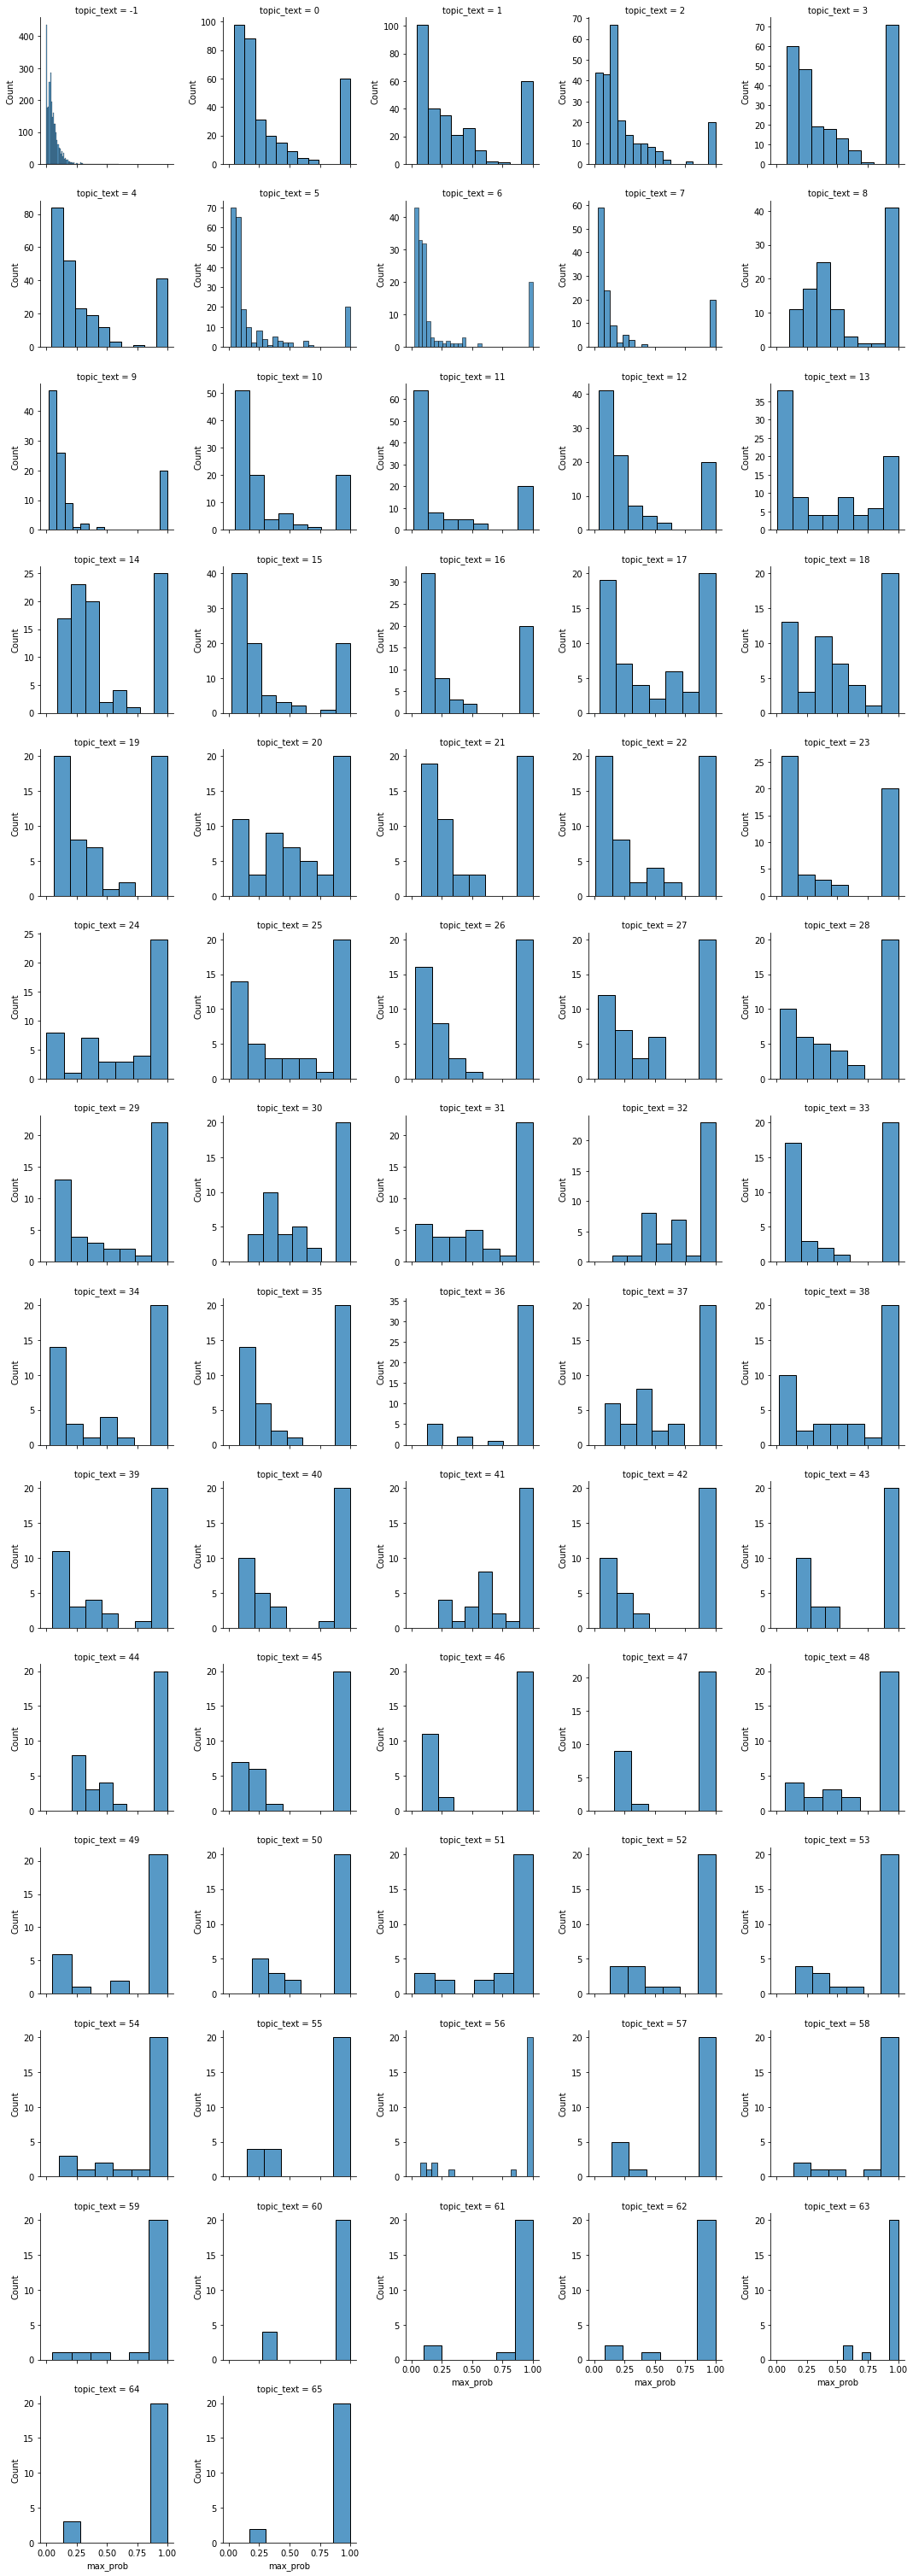

In [6]:
#facet grid for text
g = sns.FacetGrid(results, col="topic_text", col_wrap = 5, sharey = False)
g.map_dataframe(sns.histplot, x="max_prob")

# Robustness Checks

In [7]:
#empty list of sentences for each model
sentences_summaries = []
sentences_titles = []
sentences_subjects = []

#Each topic represents a 'sentence' of 10 words assigned to the topic representations (by highest CF-TF-IDF score). 
#We compare the summary's results to the title results, and subsequently the summary's results to the subject results.

#get a list (corpus run) of lists (topic words for top 5 topics) for each corpus run and clean text. 
num_topics = 9
top_topics = list(range(0,num_topics))
for topic in top_topics:
  #extracting just the words
  sentences_summaries.append(results[results['topic_text'] == topic].reset_index(drop=True).loc[0, 'words_topic'].split(",")[0:5]) #only take the top 5 words
  sentences_titles.append(results[results['topic_title'] == topic].reset_index(drop=True).loc[0, 'words_topic_title'].split(",")[0:5])#only take the top 5 words
  sentences_subjects.append(results[results['topic_subjects'] == topic].reset_index(drop=True).loc[0, 'words_topic_subjects'].split(",")[0:5])#only take the top 5 words

In [8]:
#make list of different corpus runs
corpus_runs = [sentences_summaries, sentences_titles, sentences_subjects]
#clean text
for j, corpus_run in enumerate(corpus_runs):
  for x, sentences in enumerate(corpus_runs[j]):
    for i, word in enumerate(sentences):
      word = " ".join(re.findall("[a-zA-Z]+", word))
      corpus_runs[j][x][i] = word
  

In [9]:
#quick check
print(sentences_summaries)
print(sentences_titles)
print(sentences_subjects)

[['exchange', 'exchange rate', 'rate', 'real exchange', 'real'], ['inflation', 'monetary', 'monetary policy', 'policy', 'targeting'], ['tax', 'revenue', 'vat', 'income', 'tax revenue'], ['debt', 'sovereign', 'bond', 'spread', 'market'], ['fiscal', 'fiscal policy', 'consolidation', 'rule', 'multiplier'], ['wage', 'labor', 'unemployment', 'labor market', 'employment'], ['inequality', 'income', 'poverty', 'education', 'growth'], ['shock', 'cycle', 'business cycle', 'business', 'output'], ['climate', 'subsidy', 'emission', 'carbon', 'energy']]
[['debt', 'sovereign', 'bond', 'sovereign debt', 'public debt'], ['labor', 'unemployment', 'labor market', 'wage', 'employment'], ['tax', 'taxation', 'vat', 'tax policy', 'income tax'], ['banking crisis', 'crisis', 'banking', 'financial crisis', 'bank'], ['capital', 'capital flow', 'flow', 'capital control', 'control'], ['monetary policy', 'monetary', 'policy', 'small open', 'open'], ['transmission', 'monetary policy', 'monetary', 'transmission mecha

In [10]:
#make each topic a sentence
for j, corpus_run in enumerate(corpus_runs):
  for x, topic in enumerate(corpus_runs[j]):
    corpus_runs[j][x] = ' '.join(topic)

In [11]:
#quick check
print(sentences_summaries)
print(sentences_titles)
print(sentences_subjects)

['exchange exchange rate rate real exchange real', 'inflation monetary monetary policy policy targeting', 'tax revenue vat income tax revenue', 'debt sovereign bond spread market', 'fiscal fiscal policy consolidation rule multiplier', 'wage labor unemployment labor market employment', 'inequality income poverty education growth', 'shock cycle business cycle business output', 'climate subsidy emission carbon energy']
['debt sovereign bond sovereign debt public debt', 'labor unemployment labor market wage employment', 'tax taxation vat tax policy income tax', 'banking crisis crisis banking financial crisis bank', 'capital capital flow flow capital control control', 'monetary policy monetary policy small open open', 'transmission monetary policy monetary transmission mechanism policy transmission', 'business cycle business cycle international business trade', 'housing house house price price housing market']
['exchange rate exchange rate foreign exchange effective exchange', 'bond bond ma

In [12]:
#compare summaries and titles 
model_summaries_titles = SentenceTransformer('all-mpnet-base-v2')

#Compute embedding for both lists of topics
embeddings_summaries = model_summaries_titles.encode(sentences_summaries, convert_to_tensor=True)
embeddings_titles = model_summaries_titles.encode(sentences_titles, convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores_summaries_titles = util.cos_sim(embeddings_summaries, embeddings_titles)

#Output the pairs with their score
for i in range(len(sentences_summaries)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences_summaries[i], sentences_titles[i], cosine_scores_summaries_titles[i][i]))

exchange exchange rate rate real exchange real 		 debt sovereign bond sovereign debt public debt 		 Score: 0.2612
inflation monetary monetary policy policy targeting 		 labor unemployment labor market wage employment 		 Score: 0.2677
tax revenue vat income tax revenue 		 tax taxation vat tax policy income tax 		 Score: 0.8115
debt sovereign bond spread market 		 banking crisis crisis banking financial crisis bank 		 Score: 0.3735
fiscal fiscal policy consolidation rule multiplier 		 capital capital flow flow capital control control 		 Score: 0.3132
wage labor unemployment labor market employment 		 monetary policy monetary policy small open open 		 Score: 0.2860
inequality income poverty education growth 		 transmission monetary policy monetary transmission mechanism policy transmission 		 Score: 0.1803
shock cycle business cycle business output 		 business cycle business cycle international business trade 		 Score: 0.5959
climate subsidy emission carbon energy 		 housing house house p

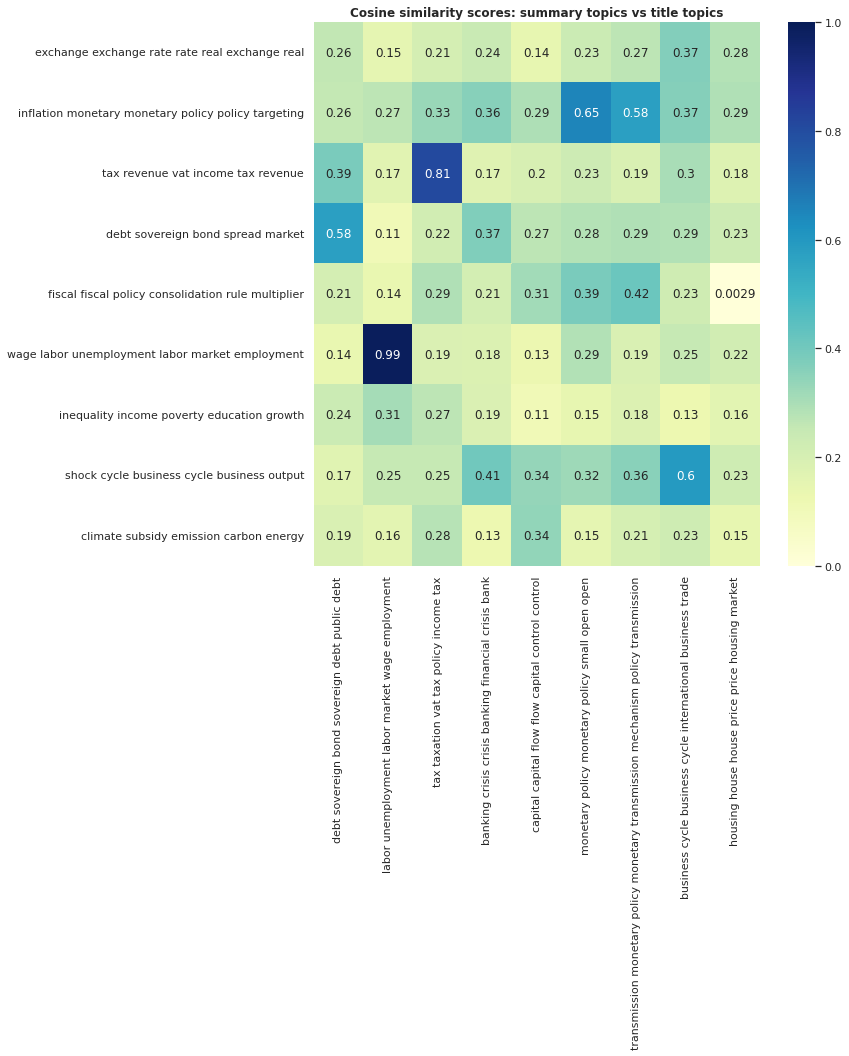

In [23]:
#make heatmap for summaries and titles cosine similarity matrix
sns.set(rc={'figure.figsize':(10,10)})
summary_title_robustness_heatmap = sns.heatmap(np.asarray(cosine_scores_summaries_titles),cmap = "YlGnBu", linecolor = 'white', vmin=0, vmax=1, annot = True, xticklabels=sentences_titles, yticklabels=sentences_summaries).set_title('Cosine similarity scores: summary topics vs title topics', fontweight = 'bold')

In [14]:
#compare summaries and subjects 
model_summaries_subjects = SentenceTransformer('all-mpnet-base-v2')


#Compute embedding for both lists
embeddings_summaries = model_summaries_subjects.encode(sentences_summaries, convert_to_tensor=True)
embeddings_subjects = model_summaries_subjects.encode(sentences_subjects, convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores_summaries_subjects = util.cos_sim(embeddings_summaries, embeddings_subjects)

#Output the pairs with their score
for i in range(len(sentences_summaries)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences_summaries[i], sentences_subjects[i], cosine_scores_summaries_subjects[i][i]))

exchange exchange rate rate real exchange real 		 exchange rate exchange rate foreign exchange effective exchange 		 Score: 0.7293
inflation monetary monetary policy policy targeting 		 bond bond market sovereign bonds market 		 Score: 0.3353
tax revenue vat income tax revenue 		 capital flow flow capital flow capital direct investment 		 Score: 0.3543
debt sovereign bond spread market 		 reserves foreign exchange reserve capital flow flow 		 Score: 0.2565
fiscal fiscal policy consolidation rule multiplier 		 commodity commodity price oil price oil price 		 Score: 0.0193
wage labor unemployment labor market employment 		 crisis financial crisis hazard moral moral hazard 		 Score: 0.1864
inequality income poverty education growth 		 policy fiscal fiscal policy fiscal policy automatic stabilizer 		 Score: 0.0686
shock cycle business cycle business output 		 tax tax revenue revenue income tax tax reform 		 Score: 0.3023
climate subsidy emission carbon energy 		 market international intern

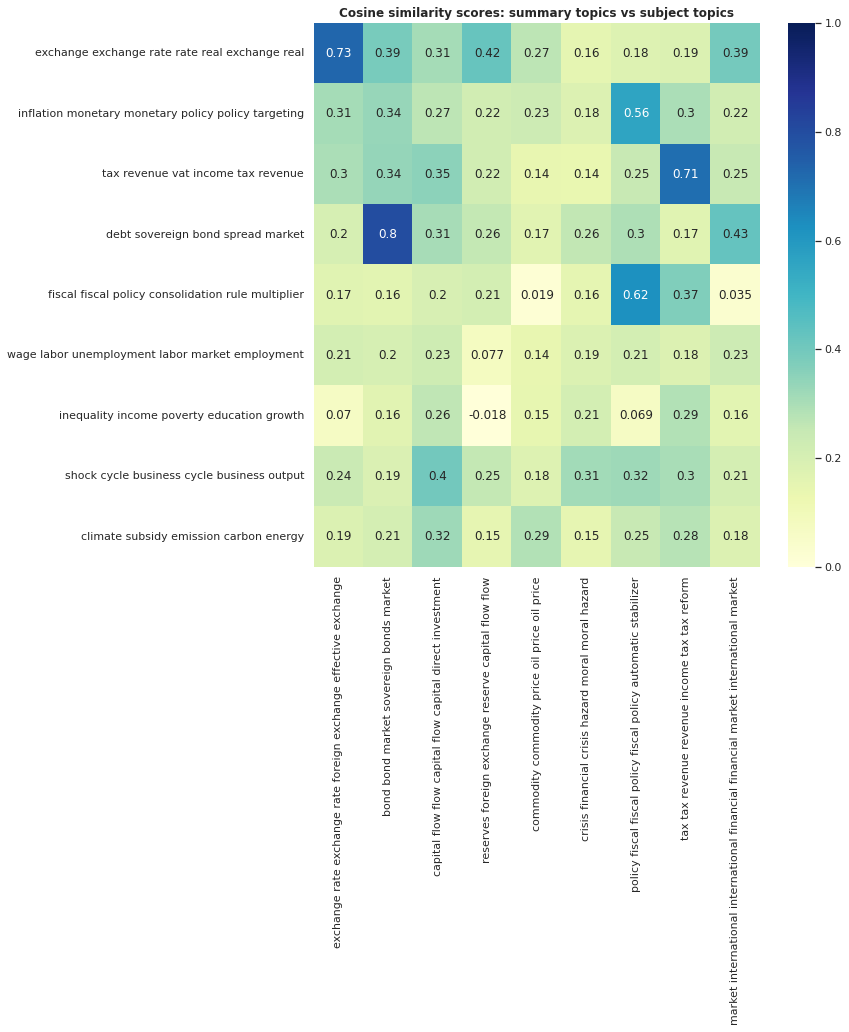

In [24]:
#make heatmap for summaries and subjects cosine similarity matrix
sns.set(rc={'figure.figsize':(10,10)})
summary_subjects_robustness_heatmap = sns.heatmap(np.asarray(cosine_scores_summaries_subjects),cmap = "YlGnBu", linecolor = 'white', vmin=0, vmax=1, annot = True, xticklabels=sentences_subjects, yticklabels=sentences_summaries).set_title('Cosine similarity scores: summary topics vs subject topics', fontweight = 'bold')
#summary_subjects_robustness_heatmap.figure.savefig(path + 'summary_subjects_robustness_heatmap.png')